In [32]:
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

In [35]:
def display(sample, sample_rate):
    X = librosa.stft(sample)
    Xdb = librosa.amplitude_to_db(librosa.magphase(X)[0])
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.show()

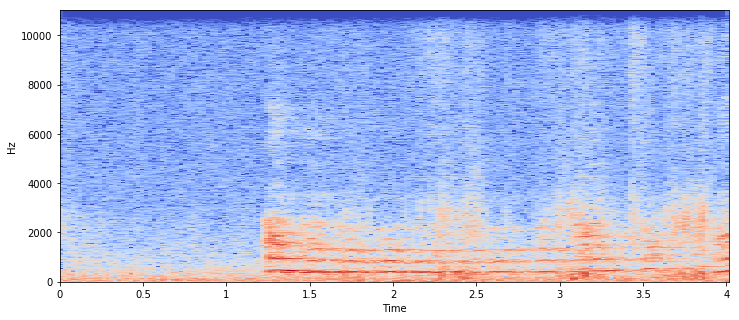

In [36]:
sound_dir = os.path.join("..", "data", "sounds")
max_sound_length = 173
file = os.path.join(sound_dir, "15.wav")
sound_id = file[len(sound_dir + "/"):-len(".wav")]
y, sr = librosa.load(file)
display(y, sr)
Audio(y, rate=sr)
#mfcc = librosa.feature.mfcc(, n_mfcc=n_mfccs)
#mfcc = librosa.util.fix_length(mfcc, max_sound_length)


In [51]:
def change_speed_pitch(sample, sample_rate):
    y_pitch_speed = sample.copy()
    # you can change low and high here
    length_change = np.random.uniform(0.5, 1.5)
    speed_fac = 1.0  / length_change
    print("resample length_change = ",length_change)
    tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
    minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
    y_pitch_speed *= 0
    y_pitch_speed[0:minlen] = tmp[0:minlen]
    display(y_pitch_speed, sample_rate)
    return Audio(y_pitch_speed, rate=sample_rate)

resample length_change =  1.3266499013460449


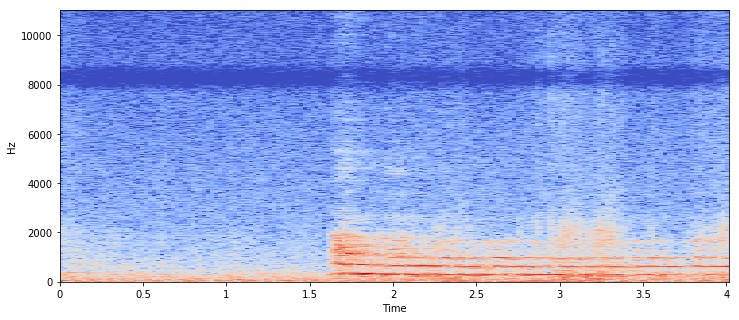

In [62]:
change_pitch_speed(y, sr)

In [70]:
def change_pitch(sample, sample_rate):
    y_pitch = sample.copy()
    bins_per_octave = 24
    pitch_pm = 4
    pitch_change =  pitch_pm * 2*(5-0.5)   
    print("pitch_change = ",pitch_change)
    y_pitch = librosa.effects.pitch_shift(y_pitch.astype('float64'), 
                                          sample_rate, n_steps=pitch_change, 
                                          bins_per_octave=bins_per_octave)
    display(y_pitch, sample_rate)
    return Audio(y_pitch, rate=sample_rate)

pitch_change =  12.0


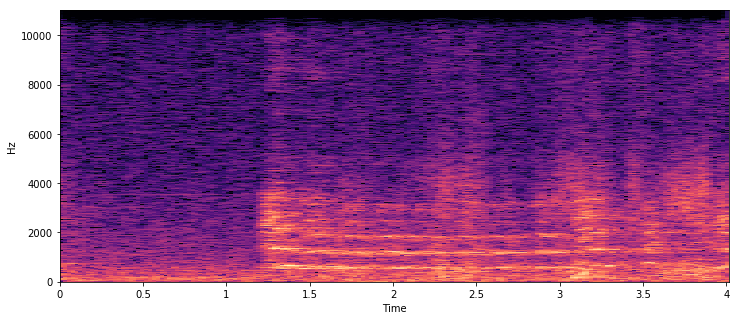

In [71]:
change_pitch(y, sr)